## KNN - K Nearest Neighbors

**This is my first attempt to demonstrate my skill using Python to impliment K Nearest Neighbors.**

I just grabbed the first random dataset from Kaggle that I thought I could use for classificiation.  There was no "class" column so I made one from the Chance of Admit percentage column.

**Please see knn.txt for additional details.**



In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

# I just like to lowercase and remove spaces from my cols to avoid common errors...
knn_df = pd.read_csv("Admission_Predict.csv", names=["id", "gre", "toefl", "u_rating", "sop", "lor", "cgpa", "research", "pred"], header=0, index_col = 0)
knn_df.head()

,gre,toefl,u_rating,sop,lor,cgpa,research,pred
id,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [147]:
# Scale the data.  I used different scalers for criteria and classes 
# It just worked out to get me better results this time around.

# Use the MinMax Scaler and make the percentage True of False at 65% on the pred column
mm_scaler = MinMaxScaler()
knn_df['pred'] = mm_scaler.fit_transform(knn_df[['pred']])
knn_df['pred'] = knn_df['pred'].apply(lambda x: 0 if x <= 0.65 else 1)
# knn_df['pred'].value_counts() # 0=220 1=180


# Use the Standard Scaler on the criteria
s_scaler = StandardScaler()
s_scaler.fit(knn_df.drop('pred',axis=1))
scaled_features = s_scaler.transform(knn_df.drop('pred',axis=1))


X_train, X_test, y_train, y_test = train_test_split(scaled_features,knn_df['pred'], test_size=0.33)


/home/h4ckfu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/h4ckfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Error Rate')

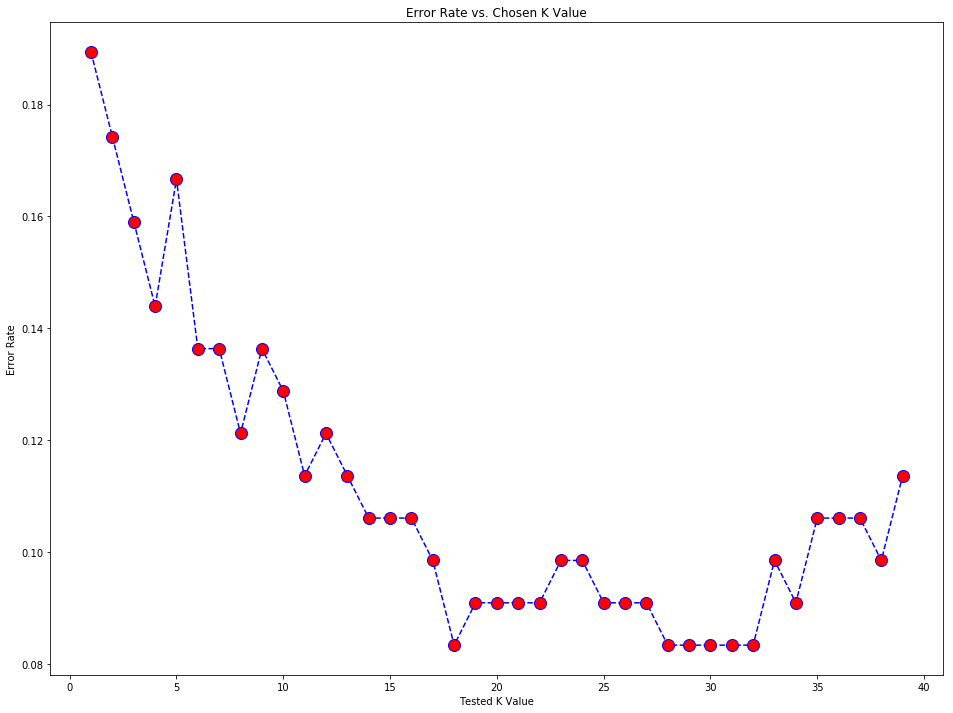

In [148]:
error = []

# loop through knn predictions with different k values to find the optimal k value

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
# Instead of a screen full of numbers lets plot it

plt.figure(figsize=(16,12))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=12)

plt.title('Error Rate vs. Chosen K Value')
plt.xlabel('Tested K Value')
plt.ylabel('Error Rate')

In [153]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(f'Confusion Matrix: \n {confusion_matrix(y_test,pred)} \n \n')
print(f'Classification Report: \n {classification_report(y_test,pred)}')

Confusion Matrix: 
 [[70  5]
 [ 6 51]] 
 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93        75
           1       0.91      0.89      0.90        57

   micro avg       0.92      0.92      0.92       132
   macro avg       0.92      0.91      0.91       132
weighted avg       0.92      0.92      0.92       132

